In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
train_df = pd.read_csv("C:\\Users\\acer\\Desktop\\Celebal\\Project\\plant-pathology-2020-fgvc7\\train.csv")
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [36]:
test_df = pd.read_csv("C:\\Users\\acer\\Desktop\\Celebal\\Project\\plant-pathology-2020-fgvc7\\test.csv")
test_df.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [37]:
train_df.describe()

,healthy,multiple_diseases,rust,scab
count,1821.000000,1821.000000,1821.000000,1821.000000
mean,0.283361,0.049973,0.341571,0.325096
std,0.450754,0.217948,0.474367,0.468539
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [38]:
train_df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


In [39]:
healthy_label = train_df['healthy'].value_counts()[1]
healthy_label

516

In [40]:
multiple_diseases = train_df['multiple_diseases'].value_counts()[1]
multiple_diseases

91

In [41]:
scab = train_df['scab'].value_counts()[1]
scab

592

In [42]:
rust = train_df['rust'].value_counts()[1]
rust

622

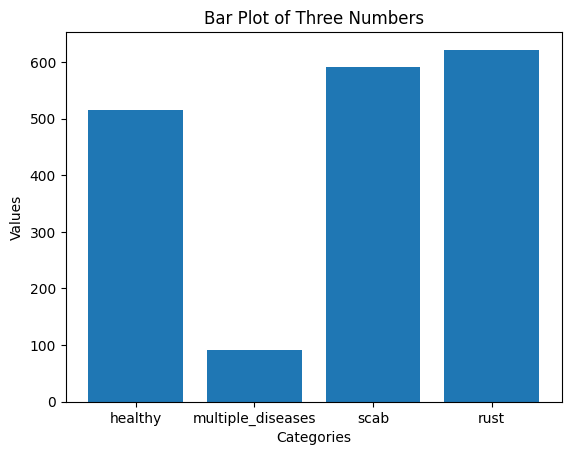

In [43]:
import matplotlib.pyplot as plt

# Data
numbers = [healthy_label, multiple_diseases, scab, rust]
labels = ['healthy', 'multiple_diseases', 'scab', 'rust']

# Create bar plot
plt.bar(labels, numbers)

# Add title and labels
plt.title('Bar Plot of Three Numbers')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show plot
plt.show()

In [44]:
import os
import pandas as pd

# Function to construct image path
def construct_image_path(image_id, folder_path):
    # Assuming all images are in JPG format
    image_path = os.path.join(folder_path, image_id + ".jpg")
    return image_path

# Sample dataframe

# Path to the folder containing the images
images_folder_path = "C:\\Users\\acer\\Desktop\\Celebal\\Project\\plant-pathology-2020-fgvc7\\images"

# Apply the function to create a new column containing image paths
train_df['image_path'] = train_df['image_id'].apply(lambda x: construct_image_path(x, images_folder_path))

# Print the dataframe with the new column
train_df

,image_id,healthy,multiple_diseases,rust,scab,image_path
0,Train_0,0,0,0,1,C:\Users\acer\Desktop\Celebal\Project\plant-pa...
1,Train_1,0,1,0,0,C:\Users\acer\Desktop\Celebal\Project\plant-pa...
2,Train_2,1,0,0,0,C:\Users\acer\Desktop\Celebal\Project\plant-pa...
3,Train_3,0,0,1,0,C:\Users\acer\Desktop\Celebal\Project\plant-pa...
4,Train_4,1,0,0,0,C:\Users\acer\Desktop\Celebal\Project\plant-pa...
...,...,...,...,...,...,...
1816,Train_1816,0,0,0,1,C:\Users\acer\Desktop\Celebal\Project\plant-pa...
1817,Train_1817,1,0,0,0,C:\Users\acer\Desktop\Celebal\Project\plant-pa...
1818,Train_1818,1,0,0,0,C:\Users\acer\Desktop\Celebal\Project\plant-pa...
1819,Train_1819,0,0,1,0,C:\Users\acer\Desktop\Celebal\Project\plant-pa...


In [45]:
import os
import shutil

def copy_images_by_column(train_df, column_name):
    # Filtered dataframe where the specified column equals 1
    filtered_df = train_df[train_df[column_name] == 1]

    # Path to the output folder for the specified column
    output_folder = os.path.join("output", column_name)

    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Iterate through the filtered dataframe and copy images to the output folder
    for _, row in filtered_df.iterrows():
        image_path = row['image_path']
        image_name = os.path.basename(image_path)
        output_path = os.path.join(output_folder, image_name)
        shutil.copyfile(image_path, output_path)

    print(f"Images for {column_name} copied to {output_folder} folder successfully.")

# Example usage:
copy_images_by_column(train_df, 'healthy')
copy_images_by_column(train_df, 'rust')
copy_images_by_column(train_df, 'scab')
copy_images_by_column(train_df, 'multiple_diseases')

Images for healthy copied to output\healthy folder successfully.
Images for rust copied to output\rust folder successfully.
Images for scab copied to output\scab folder successfully.
Images for multiple_diseases copied to output\multiple_diseases folder successfully.


In [46]:
import cv2
import os
import numpy as np
import random

# Define the path to your folder containing images
folder_path = "C:\\Users\\acer\\Desktop\\Celebal\\Project\\plant-pathology-2020-fgvc7\\output\\multiple_diseases"

# Function to augment images
def augment_images(image_path, target_count):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image '{image_path}'. Skipping...")
        return

    filename = os.path.basename(image_path)
    filename_no_ext, ext = os.path.splitext(filename)
    output_dir = os.path.dirname(image_path)

    # Calculate the number of augmented images to generate for this original image
    num_augmented_images = round(target_count / len(os.listdir(output_dir)))

    # Rotation augmentation
    for angle in range(10, 360, 60):  # Reduced rotation angles to create 1 image per original
        rotated = cv2.rotate(image, angle)
        cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_rotated_{angle}{ext}"), rotated)
        num_augmented_images -= 1
        if num_augmented_images == 0:
            break

    # Flip augmentation
    if num_augmented_images > 0:
        flipped_horizontal = cv2.flip(image, 1)
        cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_flipped_horizontal{ext}"), flipped_horizontal)
        num_augmented_images -= 1

    if num_augmented_images > 0:
        flipped_vertical = cv2.flip(image, 0)
        cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_flipped_vertical{ext}"), flipped_vertical)
        num_augmented_images -= 1
    # Randomly choose between horizontal and vertical flip for the remaining augmentations
    for _ in range(num_augmented_images):
        flip_choice = random.choice(["horizontal", "vertical"])
        if flip_choice == "horizontal":
            flipped = cv2.flip(image, 1)
            cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_flipped_{flip_choice}{ext}"), flipped)
        else:
            flipped = cv2.flip(image, 0)
            cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_flipped_{flip_choice}{ext}"), flipped)

# Iterate over each image in the folder
image_files = os.listdir(folder_path)
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    augment_images(image_path, 400)  # Augment each image to reach a total of 400 images

print("Augmentation completed.")

Augmentation completed.


In [47]:
import os
import shutil
import random

# Set the path to your dataset folder
dataset_folder = "C:\\Users\\acer\\Desktop\\Celebal\\Project\\plant-pathology-2020-fgvc7\\output"

# Define the percentages for train, test, and validation sets
train_percent = 0.7
test_percent = 0.2
val_percent = 0.1

# Create a folder for final output
final_output_folder = "C:\\Users\\acer\\Desktop\\Celebal\\Project\\plant-pathology-2020-fgvc7\\final_output"
os.makedirs(final_output_folder, exist_ok=True)

# Create folders for train, test, and validation sets inside final_output
train_folder = os.path.join(final_output_folder, "train")
test_folder = os.path.join(final_output_folder, "test")
val_folder = os.path.join(final_output_folder, "val")

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Loop through each class folder in the dataset
for class_folder in os.listdir(dataset_folder):
    class_path = os.path.join(dataset_folder, class_folder)
    if os.path.isdir(class_path):
        # Create corresponding class folders in train, test, and val sets
        train_class_path = os.path.join(train_folder, class_folder)
        test_class_path = os.path.join(test_folder, class_folder)
        val_class_path = os.path.join(val_folder, class_folder)

        os.makedirs(train_class_path, exist_ok=True)
        os.makedirs(test_class_path, exist_ok=True)
        os.makedirs(val_class_path, exist_ok=True)

        # Get the list of images in the class folder
        images = os.listdir(class_path)
        # Shuffle the images randomly
        random.shuffle(images)

    # Calculate the number of images for each set
        num_train = int(len(images) * train_percent)
        num_test = int(len(images) * test_percent)
        num_val = len(images) - num_train - num_test

        # Copy images to train set
        for img in images[:num_train]:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_class_path, img))

        # Copy images to test set
        for img in images[num_train:num_train + num_test]:
            shutil.copy(os.path.join(class_path, img), os.path.join(test_class_path, img))

        # Copy images to validation set
        for img in images[num_train + num_test:]:
            shutil.copy(os.path.join(class_path, img), os.path.join(val_class_path, img))


In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for train, test, and validation data
train_dir = 'C:\\Users\\acer\\Desktop\\Celebal\\Project\\plant-pathology-2020-fgvc7\\final_output\\train'
test_dir = 'C:\\Users\\acer\\Desktop\\Celebal\\Project\\plant-pathology-2020-fgvc7\\final_output\\test'
val_dir = 'C:\\Users\\acer\\Desktop\\Celebal\\Project\\plant-pathology-2020-fgvc7\\final_output\\val'

# Define data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create train, test, and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 1960 images belonging to 4 classes.
Found 755 images belonging to 4 classes.
Found 412 images belonging to 4 classes.


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data directories
train_dir = 'C:\\Users\\acer\\Desktop\\Celebal\\Project\\plant-pathology-2020-fgvc7\\final_output\\train'
val_dir = 'C:\\Users\\acer\\Desktop\\Celebal\\Project\\plant-pathology-2020-fgvc7\\final_output\\val'

# ImageDataGenerator for training and validation with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Found 1960 images belonging to 4 classes.
Found 412 images belonging to 4 classes.


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,124 (2.61 MB)

 Trainable params: 684,420 (2.61 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 38s 529ms/step - accuracy: 0.3672 - loss: 2.0759 - val_accuracy: 0.2812 - val_loss: 1.5577
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3750 - loss: 2.5476 - val_accuracy: 0.3571 - val_loss: 1.4346
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 42s 643ms/step - accuracy: 0.4498 - loss: 1.5777 - val_accuracy: 0.2865 - val_loss: 2.4042
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4062 - loss: 1.5070 - val_accuracy: 0.2857 - val_loss: 2.4209
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 33s 499ms/step - accuracy: 0.4610 - loss: 1.4487 - val_accuracy: 0.2917 - val_loss: 2.6795
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5938 - loss: 1.0668 - val_accuracy: 0.2143 - val_loss: 2.7038
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 627ms/step - accuracy: 0.4640 - loss: 1.4270 - val_accuracy: 0.2839 - val_loss: 2.8572
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4375 - loss: 1.3385 - val_accuracy: 0.3214

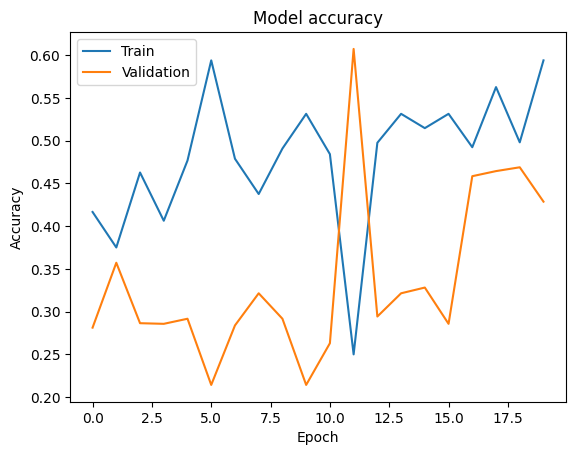

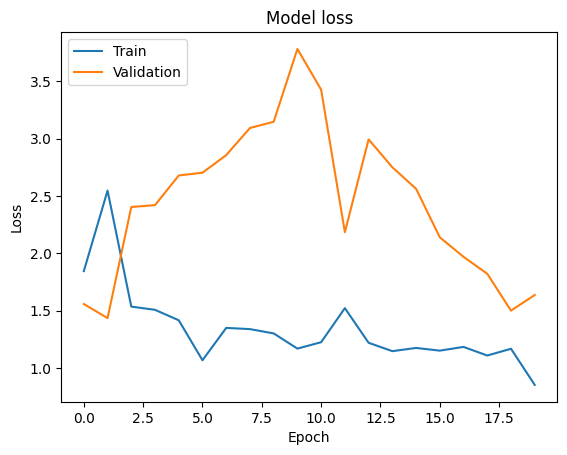

In [64]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [69]:
test_dir = 'C:\\Users\\acer\\Desktop\\Celebal\\Project\\plant-pathology-2020-fgvc7\\final_output\\test'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # This should match the input shape of the model
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

Found 755 images belonging to 4 classes.


In [70]:
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,053,966 (7.84 MB)

 Trainable params: 684,420 (2.61 MB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 1,368,842 (5.22 MB)

In [71]:
test_dir = 'C:\\Users\\acer\\Desktop\\Celebal\\Project\\plant-pathology-2020-fgvc7\\final_output\\test'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Ensure this matches the input shape of your model
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 755 images belonging to 4 classes.


In [72]:
# Inspect a batch of images and labels from the test generator
images, labels = next(test_generator)
print(images.shape)  # Should be (batch_size, 64, 64, 3)
print(labels.shape)  # Should be (batch_size, number_of_classes)


(32, 64, 64, 3)
(32, 4)


In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data directory for testing
test_dir = 'C:\\Users\\acer\\Desktop\\Celebal\\Project\\plant-pathology-2020-fgvc7\\final_output\\test'

# Data generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model
try:
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f'Test accuracy: {test_accuracy:.4f}')
    print(f'Test loss: {test_loss:.4f}')
except Exception as e:
    print(f'Error during evaluation: {e}')


Found 755 images belonging to 4 classes.
24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3339 - loss: 1.7254
Test accuracy: 0.4795
Test loss: 1.4683


24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 499ms/step


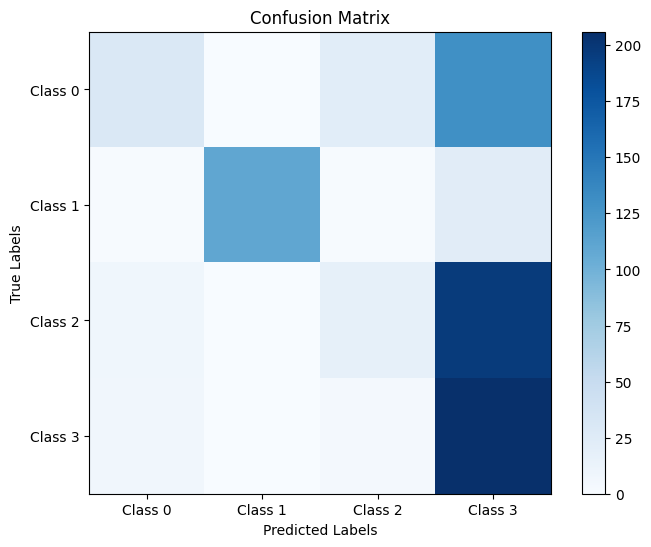

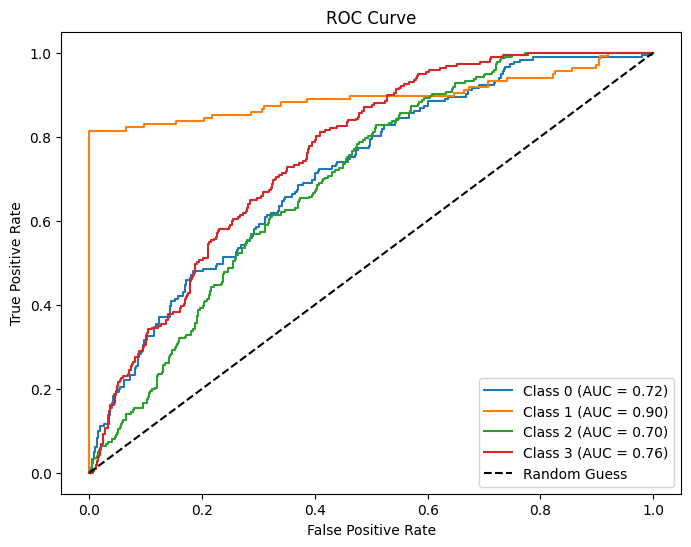

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.utils import to_categorical

# Make predictions on test data
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = test_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(4), labels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.yticks(ticks=np.arange(4), labels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.show()
# Compute ROC curve and AUC for each class
num_classes = len(np.unique(y_true))
fpr = dict()
tpr = dict()
roc_auc = dict()
y_true_binary = to_categorical(y_true, num_classes=num_classes)
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()